In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Preliminay operations

In [ ]:
train = pd.read_csv('drive/MyDrive/Tesi/Experiment/Data/train_pods_log.csv', sep=',')

In [ ]:
train.drop(labels='Unnamed: 0', axis=1, inplace=True)

In [ ]:
train.columns

Index(['idle_node1_delta', 'iowait_node1_delta', 'user_node1_delta',
       'system_node1_delta', 'irq_node1_delta', 'softirq_node1_delta',
       'nice_node1_delta', 'steal_node1_delta', 'idle_node2_delta',
       'iowait_node2_delta', 'user_node2_delta', 'system_node2_delta',
       'irq_node2_delta', 'softirq_node2_delta', 'nice_node2_delta',
       'steal_node2_delta', 'idle_node3_delta', 'iowait_node3_delta',
       'user_node3_delta', 'system_node3_delta', 'irq_node3_delta',
       'softirq_node3_delta', 'nice_node3_delta', 'steal_node3_delta',
       'worker1_pods_mem', 'worker2_pods_mem', 'worker3_pods_mem',
       'worker1_endpoints_mem', 'worker1_nodexp_mem', 'worker2_endpoints_mem',
       'worker2_nodexp_mem', 'worker3_endpoints_mem', 'worker3_nodexp_mem',
       'io_time_sdb_node1_delta', 'io_time_sdb_node2_delta',
       'io_time_sdb_node3_delta', 'read_bytes_tot_node1_delta',
       'read_bytes_tot_node2_delta', 'read_bytes_tot_node3_delta',
       'reads_completed_node1

In [ ]:
train

,idle_node1_delta,iowait_node1_delta,user_node1_delta,system_node1_delta,irq_node1_delta,softirq_node1_delta,nice_node1_delta,steal_node1_delta,idle_node2_delta,iowait_node2_delta,...,reads_completed_node2_delta,reads_completed_node3_delta,worker1_ens192_delta,worker2_ens192_delta,worker3_ens192_delta,produced_logs,ts-auth-service,ts-travel-service,ts-ui-dashboard,ts-contacts-service
0,445.28,0.48,19.61,7.79,0.0,0.89,0.0,0.0,453.44,0.47,...,0.0,0.0,4564712.0,5016609.0,9564159.0,1467,426,20,249,0.0
1,444.59,0.42,21.27,7.29,0.0,0.75,0.0,0.0,454.81,0.45,...,0.0,0.0,4464413.0,5479738.0,7602923.0,1756,342,13,201,0.0
2,446.94,0.37,19.39,7.19,0.0,0.86,0.0,0.0,455.46,0.42,...,0.0,0.0,4321960.0,4801737.0,7319263.0,1521,399,23,234,0.0
3,443.49,0.43,21.78,7.26,0.0,0.90,0.0,0.0,454.75,0.42,...,0.0,0.0,4222039.0,5719404.0,7290660.0,1840,335,18,196,0.0
4,444.83,0.42,20.79,7.43,0.0,0.75,0.0,0.0,454.49,0.42,...,0.0,0.0,4386564.0,5276439.0,7959451.0,1694,408,21,239,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5664,446.62,0.43,19.23,7.04,0.0,0.72,0.0,0.0,415.90,14.62,...,3787.0,0.0,4402832.0,4986912.0,7087061.0,1536,360,19,210,0.0
5665,445.36,0.42,20.58,7.26,0.0,0.80,0.0,0.0,442.33,3.84,...,1415.0,0.0,4418401.0,5474668.0,8096267.0,1649,341,18,199,0.0
5666,445.89,0.39,19.18,7.79,0.0,0.78,0.0,0.0,453.32,0.46,...,0.0,0.0,4120944.0,4912318.0,6603181.0,1624,352,23,207,0.0
5667,445.62,0.40,19.67,7.64,0.0,0.77,0.0,0.0,452.18,0.60,...,0.0,0.0,4294250.0,5058737.0,7234592.0,1594,345,13,200,0.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense

# Load and preprocess the data
#train.drop(labels='Time', axis=1, inplace=True)
# Split the data into train and test sets
train_data, val_data = train_test_split(train, test_size=0.2, random_state=12)
val_data1, val_data2 = train_test_split(val_data, test_size=0.5, random_state=12)
# Normalize the data using Min-Max scaling
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
val_data_scaled = scaler.fit_transform(val_data)
val_data1_scaled = scaler.fit_transform(val_data1)
val_data2_scaled = scaler.fit_transform(val_data2)

In [ ]:
test = pd.read_csv('drive/MyDrive/Tesi/Experiment/Data/Test/Refined/test_final.csv', sep=',')
test_pods =  pd.read_csv('drive/MyDrive/Tesi/Experiment/Data/Elastic/elastic_agg_sep_test.csv')
test.drop(labels='Unnamed: 0', axis=1, inplace=True)
test.drop(labels='Time', axis=1, inplace=True)
#test.drop(labels='produced_logs', axis=1, inplace=True)


In [ ]:
test

,idle_node1_delta,iowait_node1_delta,user_node1_delta,system_node1_delta,irq_node1_delta,softirq_node1_delta,nice_node1_delta,steal_node1_delta,idle_node2_delta,iowait_node2_delta,...,read_bytes_tot_node1_delta,read_bytes_tot_node2_delta,read_bytes_tot_node3_delta,reads_completed_node1_delta,reads_completed_node2_delta,reads_completed_node3_delta,worker1_ens192_delta,worker2_ens192_delta,worker3_ens192_delta,produced_logs
0,440.24,0.45,23.28,8.26,0.0,1.02,0.0,0.0,440.24,0.45,...,0.0,0.0,12288.0,0.0,0.0,3.0,4655872.0,5304403.0,8135299.0,9769
1,432.90,0.50,27.34,10.23,0.0,1.98,0.0,0.0,432.90,0.50,...,0.0,4096.0,0.0,0.0,1.0,0.0,6787022.0,11630864.0,12922413.0,13375
2,420.56,0.67,35.13,12.70,0.0,3.60,0.0,0.0,420.56,0.67,...,0.0,0.0,8192.0,0.0,0.0,2.0,4357229.0,20969424.0,28324795.0,11841
3,423.56,1.43,31.65,12.28,0.0,3.77,0.0,0.0,423.56,1.43,...,0.0,8192.0,0.0,0.0,2.0,0.0,4271090.0,18253010.0,30140849.0,12263
4,424.19,0.52,32.19,11.91,0.0,3.64,0.0,0.0,424.19,0.52,...,0.0,0.0,0.0,0.0,0.0,0.0,4388911.0,19194818.0,26716078.0,12307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,443.26,0.45,22.57,6.99,0.0,0.89,0.0,0.0,443.26,0.45,...,0.0,0.0,0.0,0.0,0.0,0.0,4208621.0,5785057.0,9857438.0,1665
116,446.77,0.41,19.32,7.41,0.0,0.75,0.0,0.0,446.77,0.41,...,0.0,0.0,0.0,0.0,0.0,0.0,4202288.0,4979861.0,7215572.0,1678
117,419.64,24.85,21.82,7.12,0.0,0.85,0.0,0.0,419.64,24.85,...,0.0,0.0,0.0,0.0,0.0,0.0,4495483.0,5479759.0,8241919.0,1896
118,445.10,0.40,20.26,7.48,0.0,0.74,0.0,0.0,445.10,0.40,...,0.0,0.0,0.0,0.0,0.0,0.0,4471887.0,5366940.0,7213014.0,1923


In [ ]:
test['ts-auth-service'] = test_pods['ts-auth-service-868688bf9c-qp4bp']
test['ts-travel-service'] = test_pods['ts-travel-service-59d4847985-sx9xq']
test['ts-ui-dashboard'] = test_pods['ts-ui-dashboard-579c4974d4-b5tw2']
test['ts-contacts-service'] = test_pods['ts-contacts-service-77fd99dd7f-jp4kg']

In [ ]:
test['ts-auth-service'].astype(int)
test['ts-travel-service'].astype(int)
test['ts-ui-dashboard'].astype(int)
test['ts-contacts-service'].astype(int)

0      0
1      0
2      0
3      0
4      0
      ..
115    0
116    0
117    0
118    0
119    0
Name: ts-contacts-service, Length: 120, dtype: int64

In [ ]:
test_data_scaled = scaler.fit_transform(test)

In [ ]:
predictions = pd.read_csv('drive/MyDrive/Tesi/Experiment/Data/Test/Refined/predictions.csv', sep=',', index_col=False)
#predictions.drop(labels=['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
gt = predictions['Gt']

## Autoencoder

In [ ]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [ ]:
# Define the input shape
input_shape = (train_data_scaled.shape[1],)  # Number of features (columns)

# Define the autoencoder architecture
input_layer = Input(shape=input_shape)
encoded1 = Dense(32, activation='relu')(input_layer)  # Adjust the number of neurons in the hidden layer as needed
encoded2 = Dense(16, activation='relu')(encoded1)
encoded3 = Dense(8, activation='relu')(encoded2)
decoded3 = Dense(16, activation='relu')(encoded3)
decoded2 = Dense(32, activation='relu')(encoded3)
decoded1 = Dense(input_shape[0], activation='sigmoid')(decoded2)

# Create the autoencoder model
autoencoder = Model(input_layer, decoded1)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(train_data_scaled, train_data_scaled, epochs=100, batch_size=64, shuffle=True, validation_data=(val_data1_scaled, val_data1_scaled))




Epoch 1/100
71/71 [==============================] - 2s 5ms/step - loss: 1.0395 - val_loss: 0.9049
Epoch 2/100
71/71 [==============================] - 0s 3ms/step - loss: 0.8456 - val_loss: 0.8268
Epoch 3/100
71/71 [==============================] - 0s 2ms/step - loss: 0.7896 - val_loss: 0.7899
Epoch 4/100
71/71 [==============================] - 0s 3ms/step - loss: 0.7700 - val_loss: 0.7845
Epoch 5/100
71/71 [==============================] - 0s 2ms/step - loss: 0.7660 - val_loss: 0.7833
Epoch 6/100
71/71 [==============================] - 0s 2ms/step - loss: 0.7642 - val_loss: 0.7852
Epoch 7/100
71/71 [==============================] - 0s 2ms/step - loss: 0.7628 - val_loss: 0.7848
Epoch 8/100
71/71 [==============================] - 0s 2ms/step - loss: 0.7613 - val_loss: 0.7860
Epoch 9/100
71/71 [==============================] - 0s 2ms/step - loss: 0.7594 - val_loss: 0.7848
Epoch 10/100
71/71 [==============================] - 0s 2ms/step - loss: 0.7587 - val_loss: 0.7865
Epoch 11/

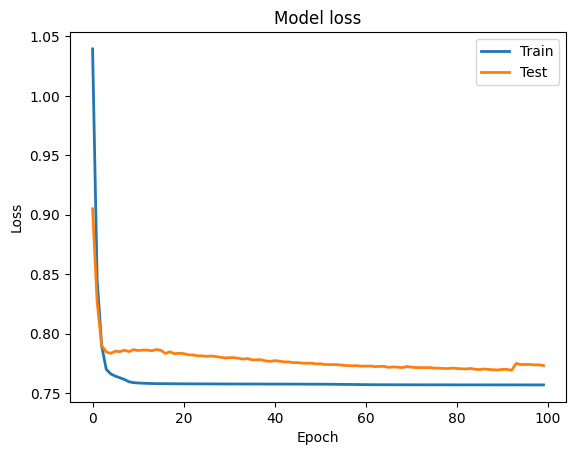

In [ ]:
import matplotlib.pyplot as plt
plt.plot(autoencoder.history.history['loss'], linewidth=2, label='Train')
plt.plot(autoencoder.history.history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [ ]:
reconstructed_data = autoencoder.predict(val_data2_scaled)
mse = np.mean(np.power(val_data2_scaled - reconstructed_data, 2), axis=1)

18/18 [==============================] - 0s 2ms/step


In [ ]:
mse

array([ 0.72167191,  2.22470929,  1.68766307,  0.25523104,  0.05590143,
        0.70431227,  0.59481489,  2.11068197,  0.10895863,  0.81202182,
        0.19515968,  0.34772877,  0.52431878,  1.70242528,  1.12470649,
        1.2685661 ,  0.09352031,  0.32702485,  0.31691773,  0.10416467,
        0.8657886 ,  0.40552248,  0.15402504,  0.46874026,  0.14523219,
        0.31348893,  0.85425384,  0.2096397 ,  0.49782489,  0.55661312,
        0.17534442,  1.32893657,  0.36014678,  0.44026219,  1.1435633 ,
        0.52008543,  4.0275675 ,  0.31066142,  0.46991364,  0.77076003,
        1.89306539,  0.30250154,  2.49773549,  0.4315935 ,  0.54444937,
        0.49134115,  1.12815832,  0.93440217,  0.80922138,  0.22879299,
        0.50624693,  0.16925383,  0.29418924,  0.50115615,  0.55724092,
        0.5900457 ,  0.06143927,  0.19644819,  0.80429464,  0.11450404,
        0.26098096,  0.1571489 ,  0.17539239,  0.1566097 ,  0.57092078,
        0.5083282 ,  0.1070362 ,  0.14880276,  0.05862643,  0.66

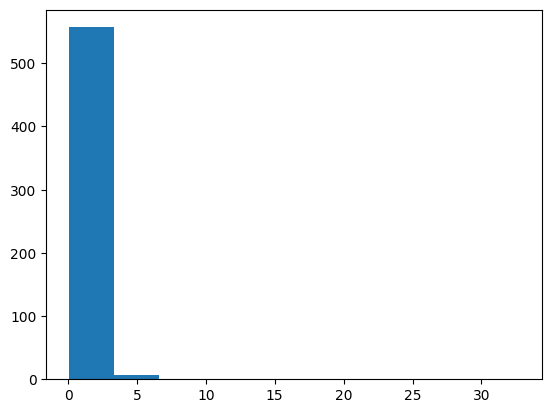

In [ ]:
plt.hist(mse)
plt.show()

In [ ]:
stderr = np.std(mse)/np.sqrt(len(mse))
stderr

0.08172505140578516

In [ ]:
np.percentile(mse, 90)

1.3046372669760642

In [ ]:
threshold = np.mean(mse) + np.std(mse)
threshold

2.6775913024982727

In [ ]:
# Use the trained autoencoder for anomaly detection
#test_data_scaled = scaler.fit_transform(test)
reconstructed_data = autoencoder.predict(test_data_scaled)
mse = np.mean(np.power(test_data_scaled - reconstructed_data, 2), axis=1)

4/4 [==============================] - 0s 3ms/step


In [ ]:
print(mse)

[0.143581   2.35816278 3.4802394  3.09586573 2.47280806 1.52474172
 1.45110623 1.45304326 1.71584435 1.55000153 1.59899279 2.32540533
 1.66216177 2.38195379 1.82780452 1.8050744  1.51635084 0.81948226
 0.25931983 0.12900202 0.38794719 0.5963485  0.40848445 0.39119382
 0.28823783 0.15714815 0.1904815  0.13398169 0.11564828 0.20888397
 0.68871159 0.16334019 0.13457004 1.05865183 0.08284605 0.11466114
 0.33376784 0.37347738 0.11590969 0.0728435  0.12665362 0.12953997
 0.08346156 0.21174279 0.18403383 0.72054342 0.15256635 0.1624694
 0.19894911 0.14102544 1.68493094 0.47480772 0.27606151 0.67017306
 0.22881271 0.16123326 4.48139548 0.38667774 1.80566327 0.15399637
 0.23052441 0.2065895  0.11242218 0.19602992 0.53667467 0.17702882
 0.28959801 0.21147864 0.22255375 0.35460898 0.66101282 0.09524715
 0.20012475 2.09669594 0.22346924 0.3047977  0.16445965 0.74634184
 0.15282568 0.13815512 0.25278537 0.22517299 0.28133501 0.2584408
 0.43674978 0.31571155 0.3439709  0.33906412 0.33126617 0.464733

In [ ]:
pred = [1 if score > 1 else 0 for score in mse]

In [ ]:
pred

[0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(gt, pred, target_names=['normal', 'attack']))

              precision    recall  f1-score   support

      normal       0.68      0.90      0.78        71
      attack       0.73      0.39      0.51        49

    accuracy                           0.69       120
   macro avg       0.71      0.64      0.64       120
weighted avg       0.70      0.69      0.67       120



## Overcomplete Autoencoder

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, concatenate

def UNet(input_dim, hidden_dim, output_dim):
    inputs = Input(shape=(input_dim,))

    # Encoder
    encoder1 = Dense(hidden_dim, activation='relu')(inputs)
    encoder1 = Dropout(0.1)(encoder1)
    encoder1 = BatchNormalization()(encoder1)

    encoder2 = Dense(hidden_dim, activation='relu')(encoder1)
    encoder2 = Dropout(0.1)(encoder2)
    encoder2 = BatchNormalization()(encoder2)

    # Decoder
    decoder2 = Dense(hidden_dim, activation='relu')(encoder2)
    decoder2 = Dropout(0.1)(decoder2)
    decoder2 = BatchNormalization()(decoder2)

    decoder1 = Dense(hidden_dim, activation='relu')(decoder2)
    decoder1 = Dropout(0.1)(decoder1)
    decoder1 = BatchNormalization()(decoder1)

    # Output
    output = Dense(output_dim, activation='sigmoid')(decoder1)

    model = Model(inputs=inputs, outputs=output)
    return model

# Define your dataset and data preprocessing
# ...

# Define hyperparameters
input_dim = train_data.shape[1]
hidden_dim = 128
output_dim = train_data.shape[1]
learning_rate = 0.001
batch_size = 64
num_epochs = 100

# Instantiate the UNet model
model = UNet(input_dim, hidden_dim, output_dim)

# Define loss function and optimizer
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss=loss_fn)

# Train the model
model.fit(train_data_scaled, train_data_scaled, epochs=num_epochs, batch_size=batch_size, shuffle=True, validation_data=(val_data1_scaled, val_data1_scaled))

Epoch 1/100
71/71 [==============================] - 4s 9ms/step - loss: 0.1810 - val_loss: 0.1729
Epoch 2/100
71/71 [==============================] - 1s 8ms/step - loss: 0.0521 - val_loss: 0.2940
Epoch 3/100
71/71 [==============================] - 1s 10ms/step - loss: 0.0087 - val_loss: 0.3298
Epoch 4/100
71/71 [==============================] - 1s 10ms/step - loss: 0.0044 - val_loss: 0.3402
Epoch 5/100
71/71 [==============================] - 1s 14ms/step - loss: 0.0032 - val_loss: 0.3457
Epoch 6/100
71/71 [==============================] - 1s 14ms/step - loss: 0.0027 - val_loss: 0.3456
Epoch 7/100
71/71 [==============================] - 1s 9ms/step - loss: 0.0024 - val_loss: 0.3463
Epoch 8/100
71/71 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.3069
Epoch 9/100
71/71 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.2493
Epoch 10/100
71/71 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.2140
Epoch

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, concatenate

def UNet(input_dim, hidden_dim, output_dim):
    inputs = Input(shape=(input_dim,))

    # Encoder
    encoder1 = Dense(hidden_dim, activation='relu')(inputs)
    encoder1 = Dropout(0.1)(encoder1)
    encoder1 = BatchNormalization()(encoder1)

    # Output
    output = Dense(output_dim, activation='sigmoid')(encoder1)

    model = Model(inputs=inputs, outputs=output)
    return model

# Define your dataset and data preprocessing
# ...

# Define hyperparameters
input_dim = train_data.shape[1]
hidden_dim = 64
output_dim = train_data.shape[1]
learning_rate = 0.001
batch_size = 64
num_epochs = 100

# Instantiate the UNet model
model = UNet(input_dim, hidden_dim, output_dim)

# Define loss function and optimizer
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss=loss_fn)

# Train the model
model.fit(train_data_scaled, train_data_scaled, epochs=num_epochs, batch_size=batch_size, shuffle=True, validation_data=(val_data1_scaled, val_data1_scaled))

Epoch 1/100
71/71 [==============================] - 1s 6ms/step - loss: 0.1646 - val_loss: 0.1756
Epoch 2/100
71/71 [==============================] - 0s 4ms/step - loss: 0.0527 - val_loss: 0.2894
Epoch 3/100
71/71 [==============================] - 0s 4ms/step - loss: 0.0110 - val_loss: 0.3338
Epoch 4/100
71/71 [==============================] - 0s 4ms/step - loss: 0.0050 - val_loss: 0.3449
Epoch 5/100
71/71 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 0.3452
Epoch 6/100
71/71 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.3471
Epoch 7/100
71/71 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.3304
Epoch 8/100
71/71 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.3211
Epoch 9/100
71/71 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.3094
Epoch 10/100
71/71 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.2903
Epoch 11/

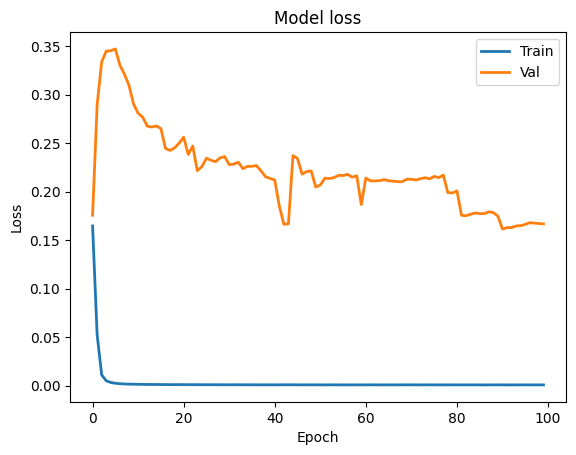

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'], linewidth=2, label='Train')
plt.plot(model.history.history['val_loss'], linewidth=2, label='Val')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 50)]              0         
                                                                 
 dense_13 (Dense)            (None, 64)                3264      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_8 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_14 (Dense)            (None, 50)                3250      
                                                                 
Total params: 6,770
Trainable params: 6,642
Non-trainable params: 128
_______________________________________________________

In [ ]:
# Anomaly detection
anomaly_scores = []
for inputs in val_data2_scaled:
    inputs = tf.expand_dims(inputs, 0)  # Add batch dimension
    outputs = model.predict(inputs)
    loss = loss_fn(outputs, inputs)
    anomaly_scores.append(loss.numpy())

# Thresholding and labeling anomalies
#threshold = 0.10  # Adjust threshold based on your data and requirements
#anomalies = [1 if score > threshold else 0 for score in anomaly_scores]

# Use anomalies as needed (e.g., visualization, further analysis)

1/1 [==============================] - 0s 33ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

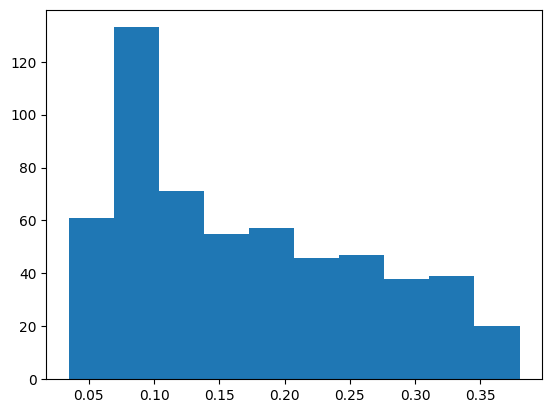

In [ ]:
plt.hist(anomaly_scores)
plt.show

In [ ]:
threshold = np.percentile(anomaly_scores, 90)
threshold

0.313055466691831

In [ ]:
threshold = np.mean(anomaly_scores) + np.std(anomaly_scores)
threshold

0.25068553278870576

In [ ]:
threshold = np.percentile(anomaly_scores, 75) + (np.std(anomaly_scores)/np.sqrt(len(anomaly_scores)))

In [ ]:
threshold

0.33162285956700444

In [ ]:
anomaly_scores = []
for inputs in test_data_scaled:
    inputs = tf.expand_dims(inputs, 0)  # Add batch dimension
    outputs = model.predict(inputs)
    loss = loss_fn(outputs, inputs)
    anomaly_scores.append(loss.numpy())

1/1 [==============================] - 0s 25ms/step


In [ ]:
anomalies = [1 if score > threshold else 0 for score in anomaly_scores]
anomalies

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0]

In [ ]:
from sklearn.metrics import classification_report #hiddendim=64 1layer
print(classification_report(gt, anomalies, target_names=['normal', 'attack']))

              precision    recall  f1-score   support

      normal       0.58      0.97      0.73        71
      attack       0.00      0.00      0.00        49

    accuracy                           0.57       120
   macro avg       0.29      0.49      0.37       120
weighted avg       0.35      0.57      0.43       120



In [ ]:
from sklearn.metrics import classification_report #hiddendim=128 1layer
print(classification_report(gt, anomalies, target_names=['normal', 'attack']))

              precision    recall  f1-score   support

      normal       0.66      0.94      0.78        71
      attack       0.79      0.31      0.44        49

    accuracy                           0.68       120
   macro avg       0.73      0.62      0.61       120
weighted avg       0.71      0.68      0.64       120



In [ ]:
from sklearn.metrics import classification_report #hiddendim=128 2layers
print(classification_report(gt, anomalies, target_names=['normal', 'attack']))

              precision    recall  f1-score   support

      normal       0.71      0.62      0.66        71
      attack       0.53      0.63      0.58        49

    accuracy                           0.62       120
   macro avg       0.62      0.63      0.62       120
weighted avg       0.64      0.62      0.63       120



In [ ]:
from sklearn.metrics import classification_report #hiddendim=64 2layers
print(classification_report(gt, anomalies, target_names=['normal', 'attack']))

              precision    recall  f1-score   support

      normal       0.66      0.96      0.78        71
      attack       0.82      0.29      0.42        49

    accuracy                           0.68       120
   macro avg       0.74      0.62      0.60       120
weighted avg       0.73      0.68      0.64       120



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, concatenate

def UNet(input_dim, hidden_dim, output_dim):
    inputs = Input(shape=(input_dim,))

    # Encoder
    encoder1 = Dense(hidden_dim, activation='relu')(inputs)
    encoder1 = Dropout(0.2)(encoder1)
    encoder1 = BatchNormalization()(encoder1)

    encoder2 = Dense(hidden_dim/2, activation='relu')(encoder1)
    encoder2 = Dropout(0.2)(encoder2)
    encoder2 = BatchNormalization()(encoder2)

    # Decoder
    decoder2 = Dense(hidden_dim/2, activation='relu')(encoder2)
    decoder2 = Dropout(0.2)(decoder2)
    decoder2 = BatchNormalization()(decoder2)
    decoder2 = concatenate([encoder2, decoder2])  # Skip connection

    decoder1 = Dense(hidden_dim, activation='relu')(decoder2)
    decoder1 = Dropout(0.2)(decoder1)
    decoder1 = BatchNormalization()(decoder1)
    decoder1 = concatenate([encoder1, decoder1])  # Skip connection

    # Output
    output = Dense(output_dim, activation='sigmoid')(decoder1)

    model = Model(inputs=inputs, outputs=output)
    return model

# Define your dataset and data preprocessing
# ...

# Define hyperparameters
input_dim = train_data_scaled.shape[1]
hidden_dim = 128
output_dim = train_data_scaled.shape[1]
learning_rate = 0.001
batch_size = 64
num_epochs = 100

# Instantiate the UNet model
model = UNet(input_dim, hidden_dim, output_dim)

# Define loss function and optimizer
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss=loss_fn)

# Train the model
model.fit(train_data_scaled, train_data_scaled, epochs=num_epochs, batch_size=batch_size, validation_data=(val_data1_scaled, val_data1_scaled))


Epoch 1/100
71/71 [==============================] - 6s 9ms/step - loss: 0.1585 - val_loss: 0.2147
Epoch 2/100
71/71 [==============================] - 0s 5ms/step - loss: 0.0189 - val_loss: 0.3100
Epoch 3/100
71/71 [==============================] - 0s 6ms/step - loss: 0.0043 - val_loss: 0.3184
Epoch 4/100
71/71 [==============================] - 0s 6ms/step - loss: 0.0028 - val_loss: 0.3151
Epoch 5/100
71/71 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.3087
Epoch 6/100
71/71 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.2963
Epoch 7/100
71/71 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.2417
Epoch 8/100
71/71 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.2296
Epoch 9/100
71/71 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.2154
Epoch 10/100
71/71 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.1937
Epoch 11/

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 dense_15 (Dense)               (None, 128)          6528        ['input_4[0][0]']                
                                                                                                  
 dropout_12 (Dropout)           (None, 128)          0           ['dense_15[0][0]']               
                                                                                                  
 batch_normalization_12 (BatchN  (None, 128)         512         ['dropout_12[0][0]']             
 ormalization)                                                                              

In [ ]:
# Anomaly detection
anomaly_scores = []
for inputs in val_data2_scaled:
    inputs = tf.expand_dims(inputs, 0)  # Add batch dimension
    outputs = model.predict(inputs)
    loss = loss_fn(outputs, inputs)
    anomaly_scores.append(loss.numpy())

1/1 [==============================] - 0s 23ms/step


In [ ]:
threshold = np.mean(anomaly_scores) + (np.std(anomaly_scores)/len(anomaly_scores)) # Adjust threshold based on your data and requirements
threshold

0.1448418786920364

In [ ]:
 np.mean(anomaly_scores) + np.std(anomaly_scores)

0.2124656404193982

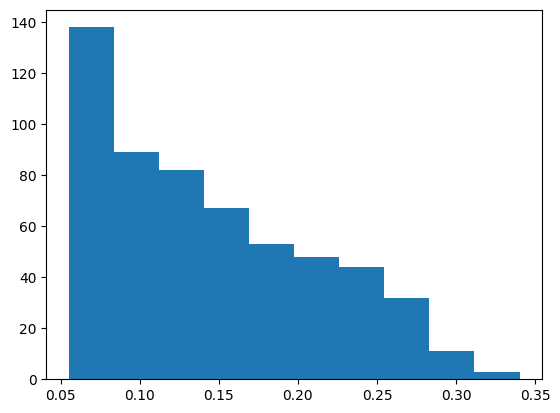

In [ ]:
plt.hist(anomaly_scores)
plt.show()

In [ ]:
# Anomaly detection
anomaly_scores = []
for inputs in test_data_scaled:
    inputs = tf.expand_dims(inputs, 0)  # Add batch dimension
    outputs = model.predict(inputs)
    loss = loss_fn(outputs, inputs)
    anomaly_scores.append(loss.numpy())

1/1 [==============================] - 0s 22ms/step


In [ ]:
# Thresholding and labeling anomalies
anomalies = [1 if score > threshold else 0 for score in anomaly_scores]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(gt, anomalies, target_names=['normal', 'attack']))

              precision    recall  f1-score   support

      normal       0.66      0.87      0.75        71
      attack       0.65      0.35      0.45        49

    accuracy                           0.66       120
   macro avg       0.66      0.61      0.60       120
weighted avg       0.66      0.66      0.63       120



## Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score

# Train the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.0007)  # Adjust the contamination parameter as needed
isolation_forest.fit(train_data_scaled)

# Classify the test data
y_pred = isolation_forest.predict(test_data_scaled)
y_pred = np.where(y_pred == -1, 1, 0)  # Convert -1 labels to 1 for anomalies

# Evaluate the performance on the test data
precision = precision_score(gt, y_pred)
recall = recall_score(gt, y_pred)
f1 = f1_score(gt, y_pred)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Precision: 0.5465116279069767
Recall: 0.9591836734693877
F1-Score: 0.6962962962962962


In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(gt, y_pred, target_names=['normal', 'attack']))

              precision    recall  f1-score   support

      normal       0.94      0.45      0.61        71
      attack       0.55      0.96      0.70        49

    accuracy                           0.66       120
   macro avg       0.74      0.70      0.65       120
weighted avg       0.78      0.66      0.64       120



##Local Outlier Factor

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_score, recall_score, f1_score

# Train the LOF model
lof_model = LocalOutlierFactor(n_neighbors=5, contamination=0.001, novelty=True)  # Adjust parameters as needed
lof_model.fit(train_data_scaled)

# Classify the test data
y_pred = lof_model.predict(test_data_scaled)
y_pred = np.where(y_pred == -1, 1, 0)  # Convert -1 labels to 1 for anomalies

# Evaluate the performance on the test data
precision = precision_score(gt, y_pred)
recall = recall_score(gt, y_pred)
f1 = f1_score(gt, y_pred)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Precision: 0.4083333333333333
Recall: 1.0
F1-Score: 0.5798816568047338


In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

##OCSVM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

# Train the One-Class SVM
svm_model = OneClassSVM(kernel='rbf', nu=0.0005)  # Adjust parameters as needed
svm_model.fit(train_data_scaled)

OneClassSVM(nu=0.0005)

In [ ]:
svm_model.fit_predict(val_data1_scaled)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [ ]:
svm_model.fit_predict(val_data2_scaled)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [ ]:
pred = svm_model.predict(test_data_scaled)

In [ ]:
binary_labels = np.where(pred == -1, 1, 0)

In [ ]:
binary_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(gt, binary_labels, target_names=['normal', 'attack']))

              precision    recall  f1-score   support

      normal       0.88      0.32      0.47        71
      attack       0.49      0.94      0.64        49

    accuracy                           0.57       120
   macro avg       0.69      0.63      0.56       120
weighted avg       0.72      0.57      0.54       120



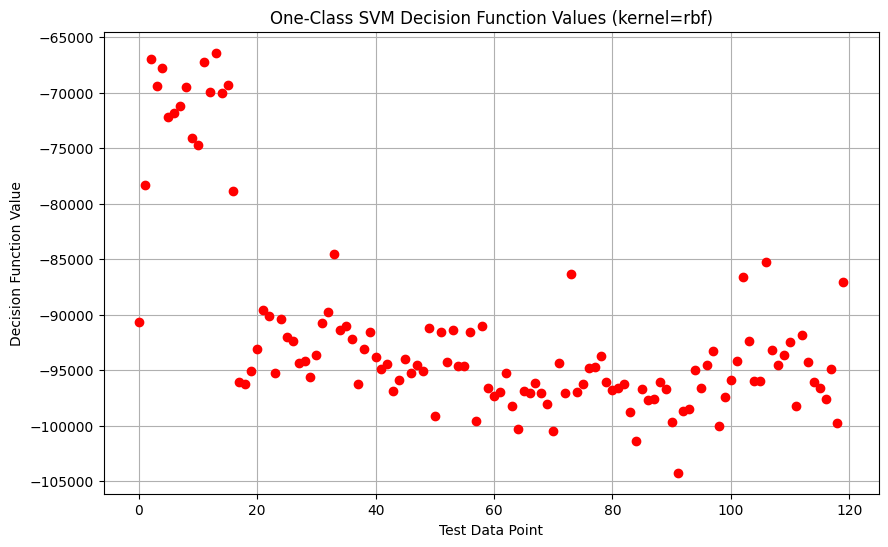

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

# Train the One-Class SVM
svm_model = OneClassSVM(kernel='linear', nu=0.9)  # Adjust parameters as needed
svm_model.fit(train_data_scaled)

# Obtain the decision function values for test data
decision_values = svm_model.decision_function(test_data_scaled)

# Plot the decision function values
plt.figure(figsize=(10, 6))
plt.plot(decision_values, 'ro')
plt.xlabel('Test Data Point')
plt.ylabel('Decision Function Value')
plt.title('One-Class SVM Decision Function Values (kernel=rbf)')
plt.grid(True)
plt.show()


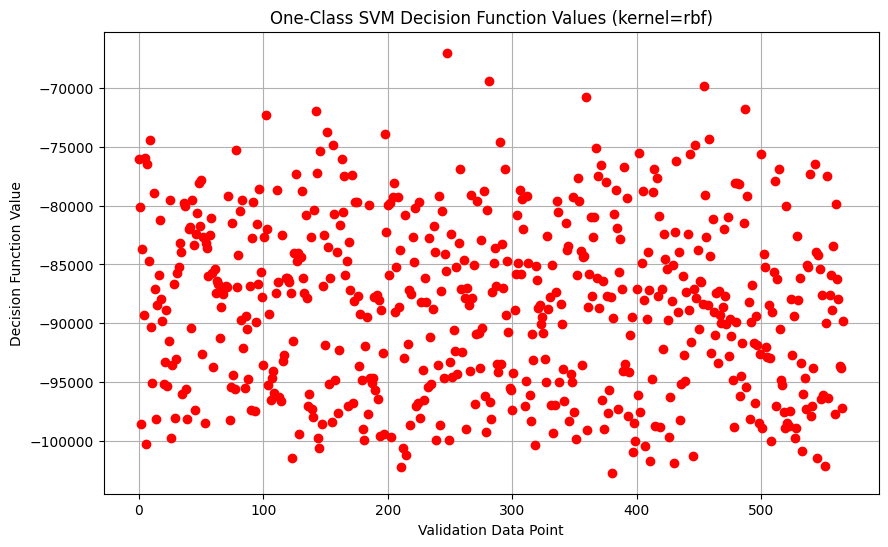

In [ ]:
# Obtain the decision function values for test data
decision_values = svm_model.decision_function(val_data2_scaled)

# Plot the decision function values
plt.figure(figsize=(10, 6))
plt.plot(decision_values, 'ro')
plt.xlabel('Validation Data Point')
plt.ylabel('Decision Function Value')
plt.title('One-Class SVM Decision Function Values (kernel=rbf)')
plt.grid(True)
plt.show()

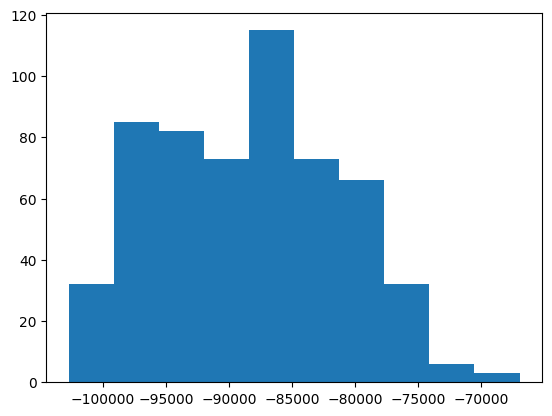

In [ ]:
plt.hist(svm_model.decision_function(val_data2_scaled))
plt.show()

In [ ]:
t_lower = np.percentile(svm_model.decision_function(val_data2_scaled), 10)
t_lower

-98181.28538784165

In [ ]:
t_upper = np.percentile(svm_model.decision_function(val_data2_scaled), 90)
t_upper

-78901.40968468237

In [ ]:
t_lower = np.mean(svm_model.decision_function(val_data2_scaled)) - np.std(svm_model.decision_function(val_data2_scaled))
t_lower

-0.006553227269295785

In [ ]:
t_upper = np.mean(svm_model.decision_function(val_data2_scaled)) +  np.std(svm_model.decision_function(val_data2_scaled))
t_upper

-858.3465186945889

In [ ]:
threshold = np.mean(svm_model.decision_function(val_data_scaled)) - (np.std(val_data_scaled)/np.sqrt(len(val_data_scaled)))
threshold

-27.96456688358639

In [ ]:
test = svm_model.decision_function(test_data_scaled)
pred = []
for t in test:
  if t >= t_upper:
    pred.append(1)
  else:
    pred.append(0)


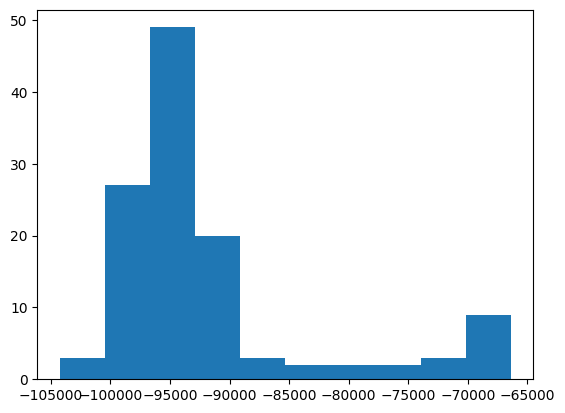

In [ ]:
plt.hist(test)
plt.show()

In [ ]:
pred

[0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(gt, pred, target_names=['normal', 'attack']))

              precision    recall  f1-score   support

      normal       0.67      0.99      0.80        71
      attack       0.94      0.31      0.46        49

    accuracy                           0.71       120
   macro avg       0.81      0.65      0.63       120
weighted avg       0.78      0.71      0.66       120



##RBM

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Define the RBM model
class RBM(nn.Module):
    def __init__(self, visible_units, hidden_units):
        super(RBM, self).__init__()
        self.W = nn.Parameter(torch.randn(hidden_units, visible_units))
        self.v_bias = nn.Parameter(torch.randn(visible_units))
        self.h_bias = nn.Parameter(torch.randn(hidden_units))

    def forward(self, x):
        hidden_prob = torch.sigmoid(torch.matmul(x, self.W.t()) + self.h_bias)
        hidden_state = torch.bernoulli(hidden_prob)
        visible_prob = torch.sigmoid(torch.matmul(hidden_state, self.W) + self.v_bias)
        return visible_prob, hidden_state

    def generate_samples(self, num_samples):
        hidden_state = torch.bernoulli(torch.sigmoid(self.h_bias))
        samples = []
        for _ in range(num_samples):
            visible_prob = torch.sigmoid(torch.matmul(hidden_state, self.W.t()) + self.v_bias)
            visible_state = torch.bernoulli(visible_prob)
            hidden_prob = torch.sigmoid(torch.matmul(visible_state, self.W) + self.h_bias)
            hidden_state = torch.bernoulli(hidden_prob)
            samples.append(visible_state)
        return torch.stack(samples)

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)
# Convert the training data to Torch tensors
train_data = torch.from_numpy(train_data_scaled).float()

# Create an instance of the RBM model
rbm_model = RBM(visible_units=50, hidden_units=128)  # Adjust the number of units as needed

# Set the optimization criterion and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(rbm_model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
batch_size = 64
for epoch in range(num_epochs):
    # Shuffle the training data
    indices = torch.randperm(train_data.size(0))
    shuffled_data = train_data[indices]

    # Mini-batch training
    for i in range(0, train_data.size(0), batch_size):
        inputs = shuffled_data[i:i+batch_size]

        # Forward pass
        visible_prob, _ = rbm_model(inputs)

        # Contrastive Divergence (CD) algorithm
        hidden_prob = torch.sigmoid(torch.matmul(visible_prob, rbm_model.W.t()) + rbm_model.h_bias)
        hidden_state = torch.bernoulli(hidden_prob)
        visible_recon_prob, _ = rbm_model(torch.matmul(hidden_state, rbm_model.W) + rbm_model.v_bias)

        # Update weights and biases
        optimizer.zero_grad()
        loss = criterion(inputs, visible_recon_prob)
        loss.backward()
        optimizer.step()

    # Print the loss for monitoring
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [1/100], Loss: 0.4093
Epoch [2/100], Loss: 0.4017
Epoch [3/100], Loss: 0.3999
Epoch [4/100], Loss: 0.4004
Epoch [5/100], Loss: 0.3977
Epoch [6/100], Loss: 0.3935
Epoch [7/100], Loss: 0.3927
Epoch [8/100], Loss: 0.3853
Epoch [9/100], Loss: 0.3911
Epoch [10/100], Loss: 0.3928
Epoch [11/100], Loss: 0.3867
Epoch [12/100], Loss: 0.3893
Epoch [13/100], Loss: 0.3761
Epoch [14/100], Loss: 0.3680
Epoch [15/100], Loss: 0.3699
Epoch [16/100], Loss: 0.3766
Epoch [17/100], Loss: 0.3661
Epoch [18/100], Loss: 0.3726
Epoch [19/100], Loss: 0.3545
Epoch [20/100], Loss: 0.3678
Epoch [21/100], Loss: 0.3690
Epoch [22/100], Loss: 0.3554
Epoch [23/100], Loss: 0.3530
Epoch [24/100], Loss: 0.3492
Epoch [25/100], Loss: 0.3522
Epoch [26/100], Loss: 0.3456
Epoch [27/100], Loss: 0.3409
Epoch [28/100], Loss: 0.3375
Epoch [29/100], Loss: 0.3378
Epoch [30/100], Loss: 0.3377
Epoch [31/100], Loss: 0.3294
Epoch [32/100], Loss: 0.3409
Epoch [33/100], Loss: 0.3205
Epoch [34/100], Loss: 0.3284
Epoch [35/100], Loss: 0

In [ ]:
# Convert the test data to Torch tensors
val_data = torch.from_numpy(val_data1_scaled).float()

# Set the RBM model to evaluation mode
rbm_model.eval()

# Calculate the reconstruction errors for the test data
reconstruction_errors = []
for i in range(val_data.size(0)):
    inputs = val_data[i:i+1]
    visible_recon_prob, _ = rbm_model(inputs)
    error = criterion(inputs, visible_recon_prob)
    reconstruction_errors.append(error.item())



In [ ]:
# Define a threshold for classifying anomalies
reconstruction_error_threshold = np.mean(reconstruction_errors) #+ 2*np.std(reconstruction_errors)
reconstruction_error_threshold

0.4100679231186708

In [ ]:


# Convert the test data to Torch tensors
test_data = torch.from_numpy(test_data_scaled).float()

# Set the RBM model to evaluation mode
rbm_model.eval()

# Calculate the reconstruction errors for the test data
reconstruction_errors = []
for i in range(test_data.size(0)):
    inputs = test_data[i:i+1]
    visible_recon_prob, _ = rbm_model(inputs)
    error = criterion(inputs, visible_recon_prob)
    reconstruction_errors.append(error.item())

# Classify instances as normal (0) or anomaly (1) based on the threshold
predictions = [0 if error <= reconstruction_error_threshold else 1 for error in reconstruction_errors]

# Print the predictions
print("Predictions:")
print(predictions)


Predictions:
[0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0]


In [ ]:
predictions[]

In [ ]:
np.mean(reconstruction_errors)

0.41441892882188164

In [ ]:
reconstruction_error_threshold

0.4046303614632373

In [ ]:
gt = predictions['Gt']

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(gt, predictions, target_names=['normal', 'attack']))

              precision    recall  f1-score   support

      normal       0.55      0.49      0.52        71
      attack       0.36      0.41      0.38        49

    accuracy                           0.46       120
   macro avg       0.45      0.45      0.45       120
weighted avg       0.47      0.46      0.46       120



## Overcomlete AE 2nd version

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, concatenate

def OAE(input_dim, hidden_dim, output_dim):
    inputs = Input(shape=(input_dim,))

    # Encoder
    encoder1 = Dense(hidden_dim, activation='relu')(inputs)
    encoder1 = Dropout(0.2)(encoder1)
    encoder1 = BatchNormalization()(encoder1)

    encoder2 = Dense(64, activation='relu')(encoder1)
    encoder2 = Dropout(0.2)(encoder2)
    encoder2 = BatchNormalization()(encoder2)

    encoder3 = Dense(32, activation='relu')(encoder2)
    encoder3 = Dropout(0.2)(encoder3)
    encoder3 = BatchNormalization()(encoder3)

    decoder2 = Dense(64, activation='relu')(encoder3)
    decoder2 = Dropout(0.2)(decoder2)
    decoder2 = BatchNormalization()(decoder2)

    decoder1 = Dense(hidden_dim, activation='relu')(decoder2)
    decoder1 = Dropout(0.2)(decoder1)
    decoder1 = BatchNormalization()(decoder1)

    # Output
    output = Dense(output_dim, activation='sigmoid')(decoder1)

    model = Model(inputs=inputs, outputs=output)
    return model

# Define your dataset and data preprocessing
# ...

# Define hyperparameters
input_dim = train_data.shape[1]
hidden_dim = 128
output_dim = train_data.shape[1]
learning_rate = 0.001
batch_size = 64
num_epochs = 100

# Instantiate the UNet model
model = OAE(input_dim, hidden_dim, output_dim)

# Define loss function and optimizer
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss=loss_fn)

# Train the model
model.fit(train_data_scaled, train_data_scaled, epochs=num_epochs, batch_size=batch_size, shuffle=True, validation_data=(val_data1_scaled, val_data1_scaled))

Epoch 1/100
71/71 [==============================] - 6s 11ms/step - loss: 0.1906 - val_loss: 0.1765
Epoch 2/100
71/71 [==============================] - 1s 7ms/step - loss: 0.0636 - val_loss: 0.2904
Epoch 3/100
71/71 [==============================] - 1s 7ms/step - loss: 0.0124 - val_loss: 0.3305
Epoch 4/100
71/71 [==============================] - 1s 7ms/step - loss: 0.0072 - val_loss: 0.3395
Epoch 5/100
71/71 [==============================] - 1s 7ms/step - loss: 0.0056 - val_loss: 0.3516
Epoch 6/100
71/71 [==============================] - 1s 7ms/step - loss: 0.0048 - val_loss: 0.3628
Epoch 7/100
71/71 [==============================] - 1s 7ms/step - loss: 0.0044 - val_loss: 0.3829
Epoch 8/100
71/71 [==============================] - 1s 8ms/step - loss: 0.0040 - val_loss: 0.3987
Epoch 9/100
71/71 [==============================] - 1s 7ms/step - loss: 0.0036 - val_loss: 0.4034
Epoch 10/100
71/71 [==============================] - 1s 7ms/step - loss: 0.0033 - val_loss: 0.4096
Epoch 11

In [ ]:
# Anomaly detection
anomaly_scores = []
for inputs in val_data2_scaled:
    inputs = tf.expand_dims(inputs, 0)  # Add batch dimension
    outputs = model.predict(inputs)
    loss = loss_fn(outputs, inputs)
    anomaly_scores.append(loss.numpy())

1/1 [==============================] - 0s 41ms/step


In [ ]:
np.percentile(anomaly_scores, 90)

0.2639789925966438

In [ ]:
threshold = np.mean(anomaly_scores) + (np.std(anomaly_scores)/np.sqrt(len(anomaly_scores)))
threshold

0.1671721901572071

In [ ]:
threshold = np.mean(anomaly_scores) + (np.std(anomaly_scores)/len(anomaly_scores)) # Adjust threshold based on your data and requirements
threshold

0.16411094246416494

In [ ]:
# Anomaly detection
anomaly_scores_test = []
for inputs in test_data_scaled:
    inputs = tf.expand_dims(inputs, 0)  # Add batch dimension
    outputs = model.predict(inputs)
    loss = loss_fn(outputs, inputs)
    anomaly_scores_test.append(loss.numpy())

1/1 [==============================] - 0s 25ms/step


In [ ]:
# Thresholding and labeling anomalies
anomalies = [1 if score > threshold else 0 for score in anomaly_scores_test]

In [ ]:
anomalies

NameError: ignored

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(gt, anomalies, target_names=['normal', 'attack']))

## LSTM

In [ ]:
test = pd.read_csv('drive/MyDrive/Tesi/Experiment/Data/Test/Refined/test_final.csv', sep=',')
test.drop(labels='Unnamed: 0', axis=1, inplace=True)
test.drop(labels='Time', axis=1, inplace=True)

In [ ]:
# Step 1: Get the last 10 rows
last_10_rows = test.tail(10)

# Step 2: Remove the last 10 rows from the original DataFrame
test_lstm = test[:-10]

# Step 3: Insert the last 10 rows at the top
test_lstm = pd.concat([last_10_rows, test_lstm], ignore_index=True)

In [ ]:
test_lstm

,idle_node1_delta,iowait_node1_delta,user_node1_delta,system_node1_delta,irq_node1_delta,softirq_node1_delta,nice_node1_delta,steal_node1_delta,idle_node2_delta,iowait_node2_delta,...,reads_completed_node2_delta,reads_completed_node3_delta,worker1_ens192_delta,worker2_ens192_delta,worker3_ens192_delta,produced_logs,ts-auth-service,ts-travel-service,ts-ui-dashboard,ts-contacts-service
0,441.64,0.44,23.35,8.16,0.0,0.87,0.0,0.0,441.64,0.44,...,0.0,0.0,4419151.0,5929852.0,9793742.0,2088,485,27,276,0.0
1,442.77,0.43,22.99,7.19,0.0,0.86,0.0,0.0,442.77,0.43,...,0.0,0.0,4334925.0,5999036.0,8146510.0,2059,466,30,274,0.0
2,440.40,0.47,25.34,7.46,0.0,1.02,0.0,0.0,440.40,0.47,...,0.0,0.0,4794640.0,6669287.0,10555601.0,1985,471,31,274,0.0
3,441.59,0.39,23.98,7.60,0.0,0.89,0.0,0.0,441.59,0.39,...,0.0,0.0,4614343.0,6190428.0,8967352.0,1632,376,21,222,0.0
4,444.86,0.41,21.26,7.23,0.0,0.77,0.0,0.0,444.86,0.41,...,0.0,0.0,4355044.0,5345423.0,8619615.0,1702,399,22,234,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,443.05,0.43,22.67,7.68,0.0,0.69,0.0,0.0,443.05,0.43,...,0.0,0.0,4363377.0,5960636.0,8111326.0,1690,395,18,230,0.0
116,441.79,0.44,23.15,7.84,0.0,0.85,0.0,0.0,441.79,0.44,...,0.0,0.0,4378204.0,5733231.0,13071038.0,1945,467,25,273,0.0
117,442.36,0.44,22.97,7.81,0.0,0.86,0.0,0.0,442.36,0.44,...,4.0,0.0,4493422.0,5586035.0,8659602.0,1850,437,26,255,0.0
118,443.61,0.43,21.65,7.42,0.0,0.80,0.0,0.0,443.61,0.43,...,0.0,0.0,4568360.0,5756846.0,8719993.0,1879,431,29,251,0.0


In [ ]:
test_data_scaled = scaler.fit_transform(test_lstm)

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error

# Step 1: Prepare your dataset
# Assuming you have a numpy array 'X_train' containing normal instances with shape (num_samples, num_features)

# Step 2: Sequence Representation
# Convert your input data into sequential representations suitable for LSTM input
sequence_length = 10  # Length of each sequence
num_features = 50  # Number of features in the dataset
X_train_sequences = []
for i in range(len(train_data_scaled) - sequence_length):
    sequence = train_data_scaled[i:i + sequence_length]
    X_train_sequences.append(sequence)
X_train_sequences = np.array(X_train_sequences)

X_val1_sequences = []
for i in range(len(val_data1_scaled) - sequence_length):
    sequence = val_data1_scaled[i:i + sequence_length]
    X_val1_sequences.append(sequence)
X_val1_sequences = np.array(X_val1_sequences)

# Step 3: Model Architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(32, input_shape=(sequence_length, num_features)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Step 4: Training
model.compile(loss='mse', optimizer='adam')
model.fit(X_train_sequences, np.ones(len(X_train_sequences)), epochs=100, validation_data=(X_val1_sequences, np.ones(len(X_val1_sequences))))


Epoch 1/100
142/142 [==============================] - 4s 11ms/step - loss: 0.0033 - val_loss: 0.0111
Epoch 2/100
142/142 [==============================] - 1s 9ms/step - loss: 1.1306e-04 - val_loss: 0.0079
Epoch 3/100
142/142 [==============================] - 2s 11ms/step - loss: 5.2614e-05 - val_loss: 0.0062
Epoch 4/100
142/142 [==============================] - 2s 11ms/step - loss: 3.1117e-05 - val_loss: 0.0052
Epoch 5/100
142/142 [==============================] - 1s 9ms/step - loss: 2.0815e-05 - val_loss: 0.0044
Epoch 6/100
142/142 [==============================] - 1s 8ms/step - loss: 1.5107e-05 - val_loss: 0.0039
Epoch 7/100
142/142 [==============================] - 1s 7ms/step - loss: 1.1616e-05 - val_loss: 0.0035
Epoch 8/100
142/142 [==============================] - 1s 7ms/step - loss: 9.2824e-06 - val_loss: 0.0031
Epoch 9/100
142/142 [==============================] - 1s 8ms/step - loss: 7.6139e-06 - val_loss: 0.0028
Epoch 10/100
142/142 [==============================] - 

In [ ]:
len(val_data_scaled)

1134

In [ ]:
X_val2_sequences = []
for i in range(len(val_data2_scaled) - sequence_length):
    sequence = val_data2_scaled[i:i + sequence_length]
    X_val2_sequences.append(sequence)
X_val2_sequences = np.array(X_val2_sequences)
# Step 5: Threshold Determination
X_val_pred = model.predict(X_val2_sequences)
val_mse = mean_squared_error(np.ones(len(X_val2_sequences)),X_val_pred)
# Set the threshold based on a statistical measure (e.g., mean plus a certain number of standard deviations)
#threshold = np.mean(val_mse) + 2 * np.std(val_mse)
#threshold = np.mean(val_mse) + (np.std(val_mse)/np.sqrt(len(val_data_scaled)))

18/18 [==============================] - 0s 3ms/step


In [ ]:
plt.scatter(val_mse)
plt.show()

TypeError: ignored

In [ ]:
threshold = np.mean(val_mse) + (np.std(val_mse)/np.sqrt(len(val_data2_scaled)))

In [ ]:
threshold = np.mean(val_mse) + 2*np.std(val_mse)

In [ ]:
threshold = np.percentile(val_mse, 95)

In [ ]:
threshold

4.872710816600145e-05

In [ ]:
# Step 6: Anomaly Detection
# Assuming you have a numpy array 'X_test' containing new instances
X_test_sequences = []
for i in range(len(test_data_scaled) - sequence_length):
    sequence = test_data_scaled[i:i + sequence_length]
    X_test_sequences.append(sequence)
X_test_sequences = np.array(X_test_sequences)

X_test_pred = model.predict(X_test_sequences)
test_mse = mean_squared_error(np.ones(len(X_test_sequences)), X_test_pred)

4/4 [==============================] - 0s 4ms/step


In [ ]:
test_mse = np.sqrt(X_test_pred - test_data_scaled[10:])

<ipython-input-164-bd2ba03d4b12>:1: RuntimeWarning: invalid value encountered in sqrt
  test_mse = np.sqrt(X_test_pred - test_data_scaled[10:])


In [ ]:
test_mse

array([[0.49306877, 0.98524934, 0.81396839, ..., 0.77420361, 0.54892838,
        0.98711257],
       [0.71485765, 0.98793642, 0.65887476, ..., 0.9255998 , 0.08202866,
        0.99082541],
       [0.97956844, 0.98972469,        nan, ..., 0.93124282, 0.3701019 ,
        0.99609899],
       ...,
       [0.40111816, 0.98191696, 0.82072114, ..., 0.72796123, 0.9799482 ,
        0.98357895],
       [0.33432822, 0.97970519, 0.86341836, ..., 0.65683375, 0.97769473,
        0.98116287],
       [0.39739777, 0.97995924, 0.81592947, ..., 0.72616234, 0.97801251,
        0.98224831]])

In [ ]:
predictions=[]
for x in test_mse:
  if np.mean(x) > threshold:
    predictions.append(1)
  else:
    predictions.append(0)
predictions

[1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1]

In [ ]:
len(predictions)

110

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(gt[:110], predictions, target_names=['normal', 'attack']))

              precision    recall  f1-score   support

      normal       0.56      0.23      0.33        61
      attack       0.45      0.78      0.57        49

    accuracy                           0.47       110
   macro avg       0.50      0.50      0.45       110
weighted avg       0.51      0.47      0.43       110

